In [1]:
import pandas as pd

file_path = '/Users/jorgemartinez/Documents/NYDSA #3 Machine Learning Project/Machine Learning Project Proposal/Ames_HousePrice.csv'
df = pd.read_csv(file_path)

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# First, let's drop columns that are unnamed or have no meaning, and also drop PID
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Identify unnamed columns and PID
unnamed_cols = [col for col in df.columns if 'unnamed' in col.lower() or 'no meaning' in col.lower()]
columns_to_drop = unnamed_cols + ['PID']

# Drop identified columns
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

print(f"Dropped {len(unnamed_cols)} unnamed columns and PID")
print(f"DataFrame shape after dropping columns: {df_cleaned.shape}")

Dropped 1 unnamed columns and PID
DataFrame shape after dropping columns: (2580, 80)


In [ ]:
# List of categorical variables where NA means something specific
meaningful_na_columns = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                        'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
                        'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                        'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType']

# Fill NA values in these columns with appropriate labels
for col in meaningful_na_columns:
    if col in df.columns:
        df[col] = df[col].fillna('None')  # Replace NA with 'None'

In [ ]:
# Impute the single missing 'Electrical' value with the most common category
df['Electrical'] = df['Electrical'].fillna('SBrkr')  # or use df['Electrical'].mode()[0]

print("Filled missing 'Electrical' value with 'SBrkr'")


Filled missing 'Electrical' value with 'SBrkr'


In [ ]:
# Step 1: For basement-related measurements
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']:
    if col in df.columns:
        # Find rows where BsmtQual was originally NA (indicating no basement)
        mask = df['BsmtQual'] == 'None'  # Now 'None' after our replacement above
        # Fill NAs with 0 for houses with no basement
        df.loc[mask, col] = df.loc[mask, col].fillna(0)
        # Fill any remaining NAs with 0
        df[col] = df[col].fillna(0)

# Step 2: For garage-related measurements
if 'GarageArea' in df.columns and 'GarageCars' in df.columns:
    mask = df['GarageType'] == 'None'  # Now 'None' after our replacement above
    # Fill NAs with 0 for houses with no garage
    df.loc[mask, 'GarageArea'] = df.loc[mask, 'GarageArea'].fillna(0)
    df.loc[mask, 'GarageCars'] = df.loc[mask, 'GarageCars'].fillna(0)
    # Fill any remaining NAs with 0
    df['GarageArea'] = df['GarageArea'].fillna(0)
    df['GarageCars'] = df['GarageCars'].fillna(0)

# Step 3: For Masonry veneer area
if 'MasVnrArea' in df.columns:
    mask = df['MasVnrType'] == 'None'
    # Fill NAs with 0 for houses with no masonry veneer
    df.loc[mask, 'MasVnrArea'] = df.loc[mask, 'MasVnrArea'].fillna(0)
    # Fill any remaining NAs with 0
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [ ]:
# Select numerical columns
df_columns = df.select_dtypes(include='number')

# Drop numerical columns with any REMAINING missing values
df_columns_no_na = df_columns.dropna(axis=1)

# Select categorical columns
categorical_df = df.select_dtypes(include='object')

print("Numerical columns with no missing values:", df_columns_no_na.shape)
print("Categorical columns:", categorical_df.shape)

Numerical columns with no missing values: (2580, 35)
Categorical columns: (2580, 43)


In [ ]:
# Select categorical columns
categorical_df = df.select_dtypes(include='object')

# Identify numerical features with missing values
numerical_missing_stats = {}
for col in df_columns:
    missing_count = df_columns[col].isna().sum()
    if missing_count > 0:
        missing_percent = (missing_count / len(df_columns)) * 100
        numerical_missing_stats[col] = {
            'missing_count': missing_count,
            'missing_percent': missing_percent,
            'missing_and_zeros': missing_count + (df_columns[col] == 0).sum(),
            'missing_and_zeros_percent': ((missing_count + (df_columns[col] == 0).sum()) / len(df_columns)) * 100
        }

# Display numerical features with missing values
print("Numerical features with missing values:")
for col, stats in numerical_missing_stats.items():
    print(f"{col}:")
    print(f"  - Missing values: {stats['missing_count']} ({stats['missing_percent']:.2f}%)")
    print(f"  - Missing values + zeros: {stats['missing_and_zeros']} ({stats['missing_and_zeros_percent']:.2f}%)")


Numerical features with missing values:
LotFrontage:
  - Missing values: 462 (17.91%)
  - Missing values + zeros: 462 (17.91%)
BsmtFullBath:
  - Missing values: 2 (0.08%)
  - Missing values + zeros: 1487 (57.64%)
BsmtHalfBath:
  - Missing values: 2 (0.08%)
  - Missing values + zeros: 2422 (93.88%)
GarageYrBlt:
  - Missing values: 129 (5.00%)
  - Missing values + zeros: 129 (5.00%)



--- LotFrontage Analysis ---
Missing values: 462
Basic statistics:
count    2118.000000
mean       68.516053
std        22.835831
min        21.000000
25%        57.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


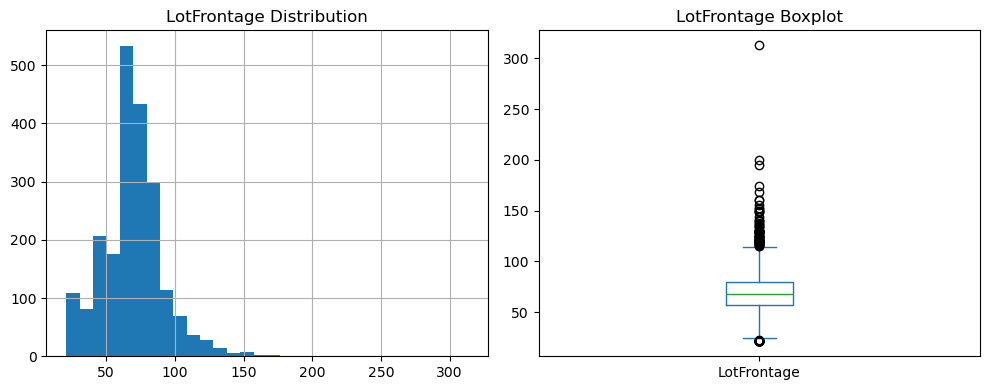

In [ ]:
# Basic analysis of LotFrontage
print("\n--- LotFrontage Analysis ---")
print("Missing values:", df['LotFrontage'].isna().sum())
print("Basic statistics:")
print(df['LotFrontage'].describe())

# Distribution visualization
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['LotFrontage'].hist(bins=30)
plt.title('LotFrontage Distribution')

plt.subplot(1, 2, 2)
df['LotFrontage'].plot.box()
plt.title('LotFrontage Boxplot')
plt.tight_layout()
plt.show()

In [ ]:
# Basic analysis of BsmtFullBath
print("\n--- BsmtFullBath Analysis ---")
print("Missing values:", df['BsmtFullBath'].isna().sum())
print("Value counts:")
print(df['BsmtFullBath'].value_counts(dropna=False).sort_index())

# Check relationship with BsmtQual
print("\nMissing BsmtFullBath values by BsmtQual:")
print(df[df['BsmtFullBath'].isna()]['BsmtQual'].value_counts())


--- BsmtFullBath Analysis ---
Missing values: 2
Value counts:
BsmtFullBath
0.0    1485
1.0    1065
2.0      27
3.0       1
NaN       2
Name: count, dtype: int64

Missing BsmtFullBath values by BsmtQual:
BsmtQual
None    2
Name: count, dtype: int64


In [ ]:
# Basic analysis of BsmtHalfBath
print("\n--- BsmtHalfBath Analysis ---")
print("Missing values:", df['BsmtHalfBath'].isna().sum())
print("Value counts:")
print(df['BsmtHalfBath'].value_counts(dropna=False).sort_index())

# Check relationship with BsmtQual
print("\nMissing BsmtHalfBath values by BsmtQual:")
print(df[df['BsmtHalfBath'].isna()]['BsmtQual'].value_counts())


--- BsmtHalfBath Analysis ---
Missing values: 2
Value counts:
BsmtHalfBath
0.0    2420
1.0     156
2.0       2
NaN       2
Name: count, dtype: int64

Missing BsmtHalfBath values by BsmtQual:
BsmtQual
None    2
Name: count, dtype: int64



--- GarageYrBlt Analysis ---
Missing values: 129
Basic statistics:
count    2451.000000
mean     1976.982048
std        24.659801
min      1895.000000
25%      1960.000000
50%      1978.000000
75%      2000.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

Missing GarageYrBlt values by GarageType:
GarageType
None      127
Detchd      2
Name: count, dtype: int64


Text(0.5, 1.0, 'GarageYrBlt Distribution')

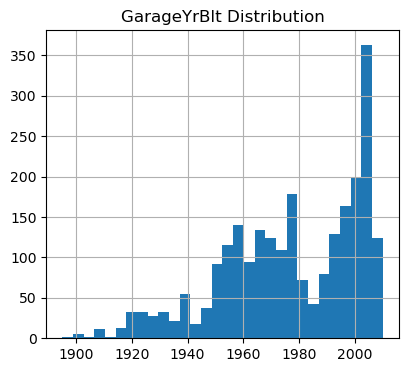

In [ ]:
# Basic analysis of GarageYrBlt
print("\n--- GarageYrBlt Analysis ---")
print("Missing values:", df['GarageYrBlt'].isna().sum())
print("Basic statistics:")
print(df['GarageYrBlt'].describe())

# Check relationship with GarageType
print("\nMissing GarageYrBlt values by GarageType:")
print(df[df['GarageYrBlt'].isna()]['GarageType'].value_counts())

# Distribution visualization
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['GarageYrBlt'].hist(bins=30)
plt.title('GarageYrBlt Distribution')


In [ ]:
# Impute missing values for specific columns

# 1. LotFrontage - impute using overall median
lot_frontage_median = df['LotFrontage'].median()
df['LotFrontage'] = df['LotFrontage'].fillna(lot_frontage_median)
print(f"Filled LotFrontage missing values with median: {lot_frontage_median}")

# 2. Basement bathrooms - fill with 0
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)

# 3. GarageYrBlt - fill differently based on GarageType
# First, get some statistics about houses with garages and missing GarageYrBlt
mask_has_garage_missing_yr = (df['GarageType'] != 'None') & (df['GarageYrBlt'].isna())
houses_with_garage_missing_yr = df[mask_has_garage_missing_yr]
count_has_garage_missing_yr = len(houses_with_garage_missing_yr)

print(f"\nStatistics for houses with garages but missing GarageYrBlt:")
print(f"Number of houses: {count_has_garage_missing_yr}")

if count_has_garage_missing_yr > 0:
    print("Details of these houses:")
    for i, (idx, row) in enumerate(houses_with_garage_missing_yr.iterrows()):
        print(f"House {i+1} (Index {idx}):")
        print(f"  GarageType: {row['GarageType']}")
        print(f"  YearBuilt: {row['YearBuilt']}")
        print(f"  GarageArea: {row['GarageArea']}")
        print(f"  GarageCars: {row['GarageCars']}")
    
    # Get garage type distribution
    garage_type_counts = houses_with_garage_missing_yr['GarageType'].value_counts()
    print(f"\nGarageType distribution for these houses:")
    for garage_type, count in garage_type_counts.items():
        print(f"  {garage_type}: {count} houses")

# Now impute the missing values
if count_has_garage_missing_yr > 0:
    # Calculate median from houses that have garages
    garage_yr_median = df[df['GarageType'] != 'None']['GarageYrBlt'].median()
    df.loc[mask_has_garage_missing_yr, 'GarageYrBlt'] = garage_yr_median
    print(f"\nFilled GarageYrBlt for {count_has_garage_missing_yr} houses with garages using median: {garage_yr_median}")

# For houses with no garage, use 0
mask_no_garage = (df['GarageType'] == 'None') & (df['GarageYrBlt'].isna())
count_no_garage = mask_no_garage.sum()
df.loc[mask_no_garage, 'GarageYrBlt'] = 0
print(f"Filled GarageYrBlt for {count_no_garage} houses without garages with 0")

# Check if we've addressed the missing values in our target columns
check_cols = ['LotFrontage', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt']
missing_counts = df[check_cols].isna().sum()
print("\nMissing values after imputation:")
print(missing_counts)

Filled LotFrontage missing values with median: 68.0

Statistics for houses with garages but missing GarageYrBlt:
Number of houses: 2
Details of these houses:
House 1 (Index 433):
  GarageType: Detchd
  YearBuilt: 1923
  GarageArea: 0.0
  GarageCars: 0.0
House 2 (Index 531):
  GarageType: Detchd
  YearBuilt: 1910
  GarageArea: 360.0
  GarageCars: 1.0

GarageType distribution for these houses:
  Detchd: 2 houses

Filled GarageYrBlt for 2 houses with garages using median: 1978.0
Filled GarageYrBlt for 127 houses without garages with 0

Missing values after imputation:
LotFrontage     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
dtype: int64


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
# Check data type of Electrical
print("Data type of 'Electrical':", df['Electrical'].dtype)

# Optional: check unique values and missing count
print("\nUnique values in 'Electrical':")
print(df['Electrical'].value_counts(dropna=False))


Data type of 'Electrical': object

Unique values in 'Electrical':
Electrical
SBrkr    2366
FuseA     168
FuseF      39
FuseP       7
Name: count, dtype: int64


In [ ]:
#find out how many missing values are still in the dataframe

In [2]:
from sklearn.preprocessing import OneHotEncoder

def drop_most_frequent_category(df_cat):
    new_df = pd.DataFrame()
    for col in df_cat.columns:
        counts = df_cat[col].value_counts()
        # Get the most frequent category
        drop_cat = counts.idxmax()

        # Perform one-hot encoding and drop the most frequent category
        dummies = pd.get_dummies(df_cat[col], prefix=col)
        dummies = dummies.drop(f"{col}_{drop_cat}", axis=1)

        new_df = pd.concat([new_df, dummies], axis=1)
    return new_df


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Apply the custom one-hot encoding
categorical_encoded = drop_most_frequent_category(categorical_df)

print("Shape after encoding categorical variables:", categorical_encoded.shape)

Shape after encoding categorical variables: (2580, 231)


In [ ]:
X = pd.concat([df_columns_no_na.drop(columns=['SalePrice'], errors='ignore'),
               categorical_encoded], axis=1)

# Target variable
y = df['SalePrice']

print("Final shape of X:", X.shape)

Final shape of X: (2580, 265)


In [ ]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np
import matplotlib.pyplot as plt

# Set up 5-fold cross-validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

In [ ]:
# Function for cross-validation
def evaluate_model_cv(model, X, y):
    # Get R² scores
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    
    # Get RMSE scores
    mse_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(mse_scores)
    
    # Print results
    print(f"Model: {model.__class__.__name__}")
    print(f"Average RMSE: ${rmse_scores.mean():,.2f}")
    print(f"Average R²: {r2_scores.mean():.4f}")
    print("-" * 30)
    
    return {
        'model_name': model.__class__.__name__,
        'rmse_mean': rmse_scores.mean(),
        'r2_mean': r2_scores.mean()
    }

In [ ]:
# 1. Multiple Linear Regression with cross-validation
print("Multiple Linear Regression:")
mlr = LinearRegression()
mlr_results = evaluate_model_cv(mlr, X, y)

Multiple Linear Regression:
Model: LinearRegression
Average RMSE: $22,746.18
Average R²: 0.9068
------------------------------


In [ ]:
# 2. Ridge Regression with cross-validation
print("Ridge Regression (alpha=1.0):")
ridge = Ridge(alpha=1.0) 
ridge_results = evaluate_model_cv(ridge, X, y)

Ridge Regression (alpha=1.0):
Model: Ridge
Average RMSE: $21,862.91
Average R²: 0.9138
------------------------------


/opt/anaconda3/envs/ml_project/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.78534e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/envs/ml_project/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.4342e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/envs/ml_project/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.92009e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/envs/ml_project/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.72893e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda

In [ ]:
# 3. Lasso Regression with cross-validation
print("Lasso Regression (alpha=0.01):")
lasso = Lasso(alpha=0.01)
lasso_results = evaluate_model_cv(lasso, X, y)

Lasso Regression (alpha=0.01):


/opt/anaconda3/envs/ml_project/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.804e+11, tolerance: 1.090e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/ml_project/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.325e+11, tolerance: 1.096e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/ml_project/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

Model: Lasso
Average RMSE: $22,592.86
Average R²: 0.9081
------------------------------


/opt/anaconda3/envs/ml_project/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.664e+11, tolerance: 1.209e+09
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Collect all results
all_results = [mlr_results, ridge_results, lasso_results]

# Create comparison table
results_df = pd.DataFrame(all_results)
print("\nModel Comparison:")
print(results_df)


Model Comparison:
         model_name     rmse_mean   r2_mean
0  LinearRegression  22746.179244  0.906764
1             Ridge  21862.909063  0.913821
2             Lasso  22592.859707  0.908062
